<a href="https://colab.research.google.com/github/Swetha-18/IPL-Case-Study/blob/main/IPL_Case_Study_swethabonkuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
# load the data set
df_ball_by_ball = pd.read_csv("/content/IPL_Ball_by_Ball_2008_2022.csv")

In [ ]:
# load the data set
df_matches = pd.read_csv("/content/IPL_Matches_2008_2022[1].csv")

In [ ]:
# Check the data types of each column.
df_ball_by_ball.dtypes

# Check for any missing values.
df_ball_by_ball.isnull().sum()

# Check for any duplicate rows.
df_ball_by_ball.duplicated().sum()

0

In [ ]:
# Print the column names to verify the column name
print(df_ball_by_ball.columns)


Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')


In [ ]:
# Impute missing values in the "batsman_run" column with the mean of the column.
# This step replaces missing values with the average value of the column to maintain data integrity.
df_ball_by_ball["batsman_run"].fillna(df_ball_by_ball["batsman_run"].mean(), inplace=True)

# Drop rows with missing values if they have fewer than 10 non-missing values.
# Dropping rows with a significant number of missing values can help remove incomplete or uninformative data.
# A threshold of 10 non-missing values is chosen, but we can adjust it based on our data quality requirements.
df_ball_by_ball.dropna(thresh=10, inplace=True)



In [ ]:
# Using the IQR rule to identify outliers for the "batsman_run" column.
Q1 = df_ball_by_ball["batsman_run"].quantile(0.25)
Q3 = df_ball_by_ball["batsman_run"].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) in the "batsman_run" column.
df_ball_by_ball = df_ball_by_ball[df_ball_by_ball["batsman_run"].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]

In [ ]:
# Explode the 'fielders_involved' column to create multiple rows for each fielder involved.
df_ball_by_ball = df_ball_by_ball.explode("fielders_involved")

In [ ]:
# Merge the `df_ball_by_ball` and `df_matches` DataFrames on the `ID` column.
df_merged = df_ball_by_ball.merge(df_matches, on="ID")


In [ ]:
print(df_merged)


             ID  innings  overs  ballnumber       batter          bowler  \
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
118080   598029        1     14           5   EJG Morgan      MG Johnson   
118081   598029        1     14           6    MK Tiwary      MG Johnson   
118082   598029        1     15           1   EJG Morgan       YS Chahal   
118083   598029        1     15           2   EJG Morgan       YS Chahal   
118084   598029        1     15           3    MK Tiwary       YS Chahal   

        non-striker extra_type  batsman_run  extras_run  ...  SuperOver  \
0        JC 

<Axes: >

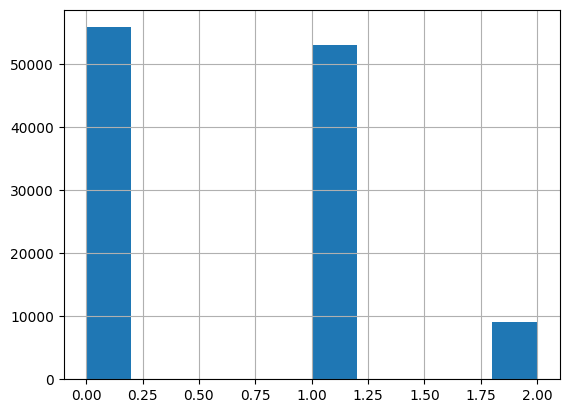

In [ ]:
#  univariate analysis
df_merged["batsman_run"].hist()


<Axes: >

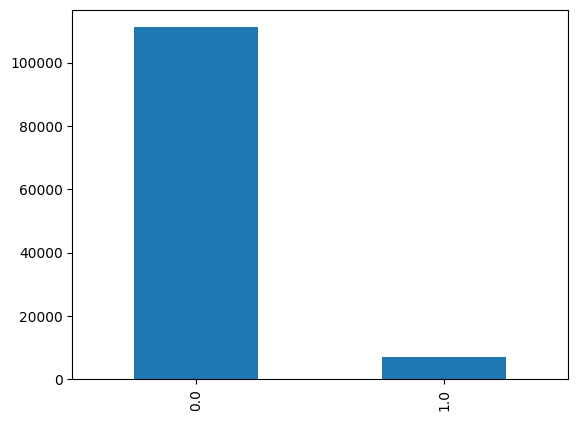

In [ ]:
df_merged["isWicketDelivery"].value_counts().plot.bar()


In [ ]:
df_merged["bowler"].value_counts().head(10)


SP Narine         2627
YS Chahal         2541
B Kumar           2441
R Ashwin          2425
JJ Bumrah         2403
AR Patel          2274
RA Jadeja         2152
Rashid Khan       1992
Sandeep Sharma    1969
DJ Bravo          1777
Name: bowler, dtype: int64

In [ ]:
df_merged["batter"].value_counts().head(10)


S Dhawan      3132
V Kohli       3069
DA Warner     2759
KL Rahul      2427
RG Sharma     2400
SV Samson     2192
AM Rahane     2170
AT Rayudu     2056
RV Uthappa    2048
MK Pandey     2021
Name: batter, dtype: int64

In [ ]:
df_merged[df_merged["batsman_run"] == 6]["batter"].value_counts().head(10)


Series([], Name: batter, dtype: int64)

<Axes: xlabel='batsman_run', ylabel='isWicketDelivery'>

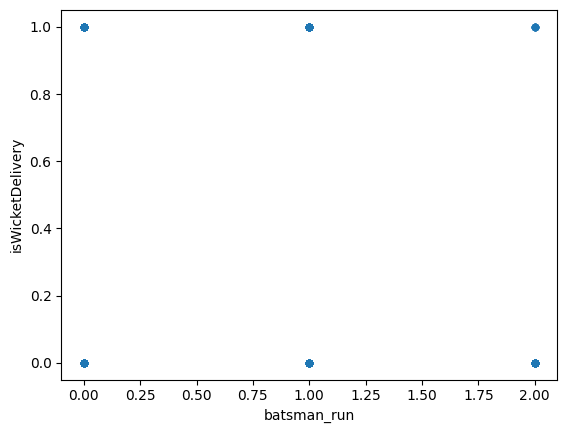

In [ ]:
# bivariate analysis:
df_merged.plot.scatter("batsman_run", "isWicketDelivery")


In [ ]:
df_merged["TossDecision"].value_counts()

field    83184
bat      34901
Name: TossDecision, dtype: int64

<Axes: >

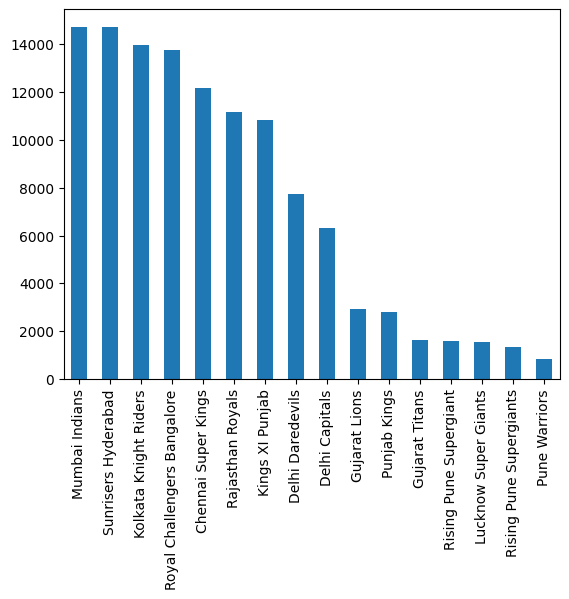

In [ ]:
df_merged["BattingTeam"].value_counts().plot.bar()


<Axes: xlabel='batsman_run', ylabel='total_run'>

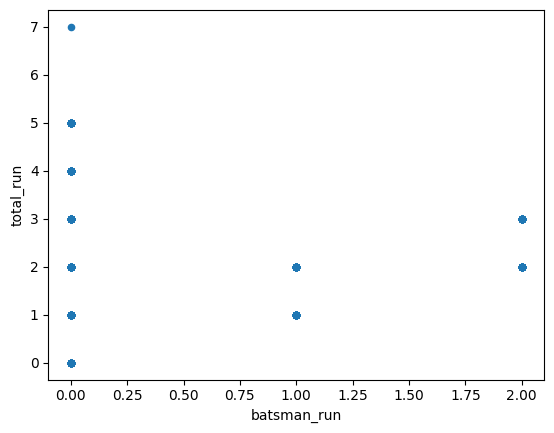

In [ ]:
df_merged.plot.scatter("batsman_run", "total_run")


<Axes: >

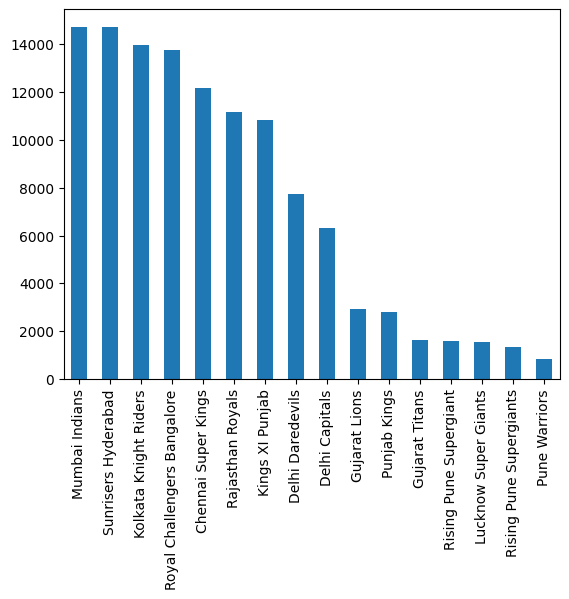

In [ ]:
df_merged["BattingTeam"].value_counts().plot.bar()


<ipython-input-42-a24086c32872>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged.groupby("BattingTeam").mean().plot.bar()


<Axes: xlabel='BattingTeam'>

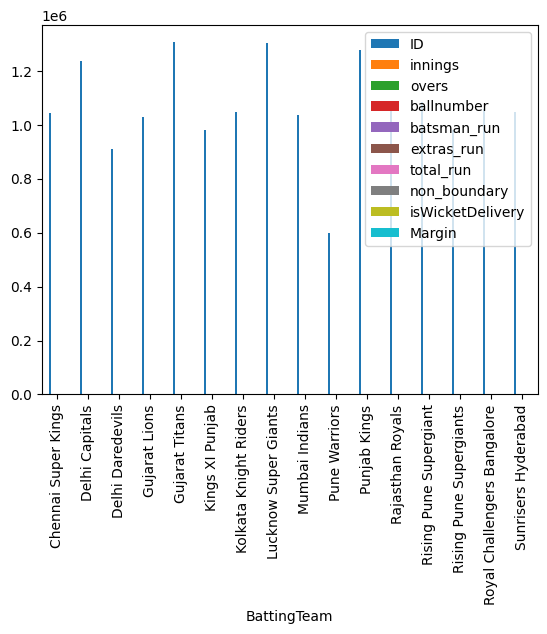

In [ ]:
df_merged.groupby("BattingTeam").mean().plot.bar()



In [ ]:
# 1. Overs 0-19, which over has the most runs scored in, on average?
average_runs_per_over = df_merged[df_merged["overs"] <= 19].groupby("overs")["batsman_run"].mean()
over_with_most_runs = average_runs_per_over.idxmax()
average_runs_in_over = average_runs_per_over.max()
print(f"The over with the most runs scored in, on average, is over {over_with_most_runs}. The average runs scored in over {over_with_most_runs} is {average_runs_in_over:.2f}")

The over with the most runs scored in, on average, is over 16. The average runs scored in over 16 is 0.70


In [ ]:
print(df_merged.columns)


Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'City', 'Date', 'Season',
       'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision',
       'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')


In [ ]:
# Find the top 10 umpires who were part of the most matches
top_umpires = df_merged["Umpire1"].append(df_merged["Umpire2"]).value_counts().head(10)
print("The top 10 umpires who were part of the most matches are:")
print(top_umpires)


The top 10 umpires who were part of the most matches are:
AK Chaudhary             19789
S Ravi                   19497
Nitin Menon              16491
C Shamshuddin            14787
CB Gaffaney              13890
KN Ananthapadmanabhan    11296
CK Nandan                11146
HDPK Dharmasena          10672
M Erasmus                 9417
VK Sharma                 9091
dtype: int64


<ipython-input-63-4afbb20cbae7>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_umpires = df_merged["Umpire1"].append(df_merged["Umpire2"]).value_counts().head(10)


In [ ]:
# 3. Which team has the highest probability of winning a match given that they had won the toss?
toss_winners = df_merged[df_merged["TossDecision"] == "bat"]["WinningTeam"]
team_with_highest_probability = toss_winners.value_counts(normalize=True).idxmax()
highest_probability = toss_winners.value_counts(normalize=True).max() * 100
print(f"The team with the highest probability of winning a match given that they had won the toss is {team_with_highest_probability}. The probability is {highest_probability:.2f}%")


The team with the highest probability of winning a match given that they had won the toss is Mumbai Indians. The probability is 18.41%


In [ ]:
# 4. Top 10 most successful bowlers in terms of number of wickets taken
top_bowlers = df_merged["bowler"].value_counts().head(10)
print("The top 10 most successful bowlers in terms of the number of wickets taken are:")
print(top_bowlers)

The top 10 most successful bowlers in terms of the number of wickets taken are:
SP Narine         2627
YS Chahal         2541
B Kumar           2441
R Ashwin          2425
JJ Bumrah         2403
AR Patel          2274
RA Jadeja         2152
Rashid Khan       1992
Sandeep Sharma    1969
DJ Bravo          1777
Name: bowler, dtype: int64


In [ ]:
# 5. Calculate for each team the number of playoff matches played.
playoff_matches_by_team = df_merged.groupby("BattingTeam")["WinningTeam"].count()
print("The number of playoff matches played by each team is:")
print(playoff_matches_by_team)



The number of playoff matches played by each team is:
BattingTeam
Chennai Super Kings            12165
Delhi Capitals                  6305
Delhi Daredevils                7632
Gujarat Lions                   2942
Gujarat Titans                  1640
Kings XI Punjab                10845
Kolkata Knight Riders          13972
Lucknow Super Giants            1532
Mumbai Indians                 14718
Pune Warriors                    840
Punjab Kings                    2823
Rajasthan Royals               11168
Rising Pune Supergiant          1610
Rising Pune Supergiants         1334
Royal Challengers Bangalore    13611
Sunrisers Hyderabad            14708
Name: WinningTeam, dtype: int64


In [ ]:
# 6. On which venue, the team batting second has the most advantage?
venue_with_most_advantage = df_merged[df_merged["innings"] == 2].groupby("Venue")["WinningTeam"].value_counts(normalize=True).idxmax()[0]
win_percentage = df_merged[(df_merged["Venue"] == venue_with_most_advantage) & (df_merged["innings"] == 2)]["WinningTeam"].value_counts(normalize=True).max() * 100
print(f"The venue where the team batting second has the most advantage is {venue_with_most_advantage}. The win percentage is {win_percentage:.2f}%")


The venue where the team batting second has the most advantage is Himachal Pradesh Cricket Association Stadium. The win percentage is 100.00%


In [ ]:
# 7. Which batsman in the history of IPL has been caught out the most?
most_caught_out_batsman = df_merged[df_merged["kind"] == "caught"]["batter"].value_counts().idxmax()
most_caught_out_count = df_merged[df_merged["kind"] == "caught"]["batter"].value_counts().max()
print(f"The batsman in the history of IPL who has been caught out the most is {most_caught_out_batsman}. He has been caught out {most_caught_out_count} times.")

The batsman in the history of IPL who has been caught out the most is RG Sharma. He has been caught out 87 times.


In [ ]:
# 8. Which bowler has taken the wicket of the batsman in question 7?
bowler_for_batsman_7 = most_caught_out_batsman
bowler_for_batsman_7_stats = df_merged[df_merged["batter"] == bowler_for_batsman_7]["bowler"].value_counts().idxmax()
wickets_taken_by_bowler = df_merged[(df_merged["batter"] == bowler_for_batsman_7) & (df_merged["bowler"] == bowler_for_batsman_7_stats)]["isWicketDelivery"].sum()
print(f"The bowler who has taken the wicket of {bowler_for_batsman_7} the most number of times is {bowler_for_batsman_7_stats}. He has taken {wickets_taken_by_bowler} wickets of {bowler_for_batsman_7}.")

The bowler who has taken the wicket of RG Sharma the most number of times is SP Narine. He has taken 6.0 wickets of RG Sharma.
